Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

Generate AR process

In [2]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

Function to perform adf test
The Dickey-Fuller test is a way to determine whether the above process has a unit root.
The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis.

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

AR(1) Process
Stationary

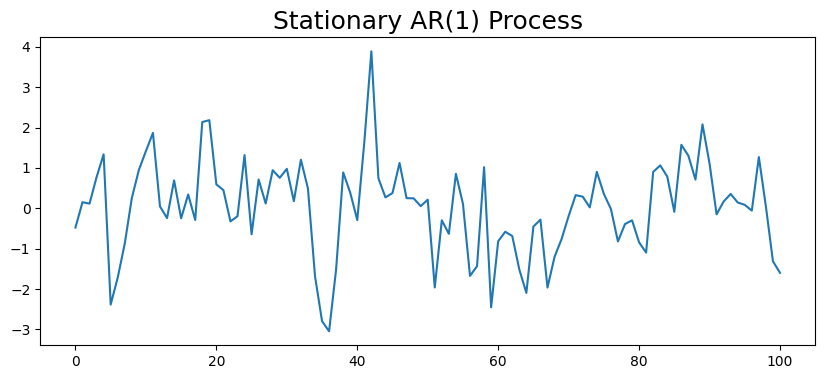

In [4]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)
plt.show()

In [5]:
perform_adf_test(ar_1_process)

ADF Statistic: -5.913361
p-value: 0.000000


NON-STATIONARY

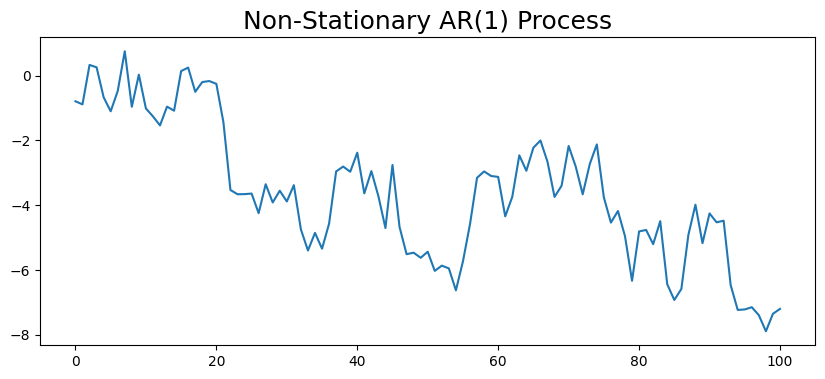

In [6]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)
plt.show()

In [7]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -1.976745
p-value: 0.296862


AR(2) Process
STATIONARY

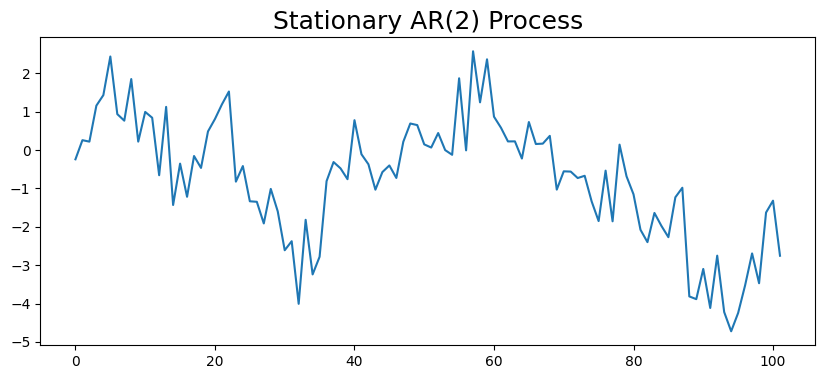

In [8]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)
plt.show()

perform the dickey fuller test 

In [9]:
perform_adf_test(ar_2_process)

ADF Statistic: -1.932129
p-value: 0.317101


NON-STATIONARY

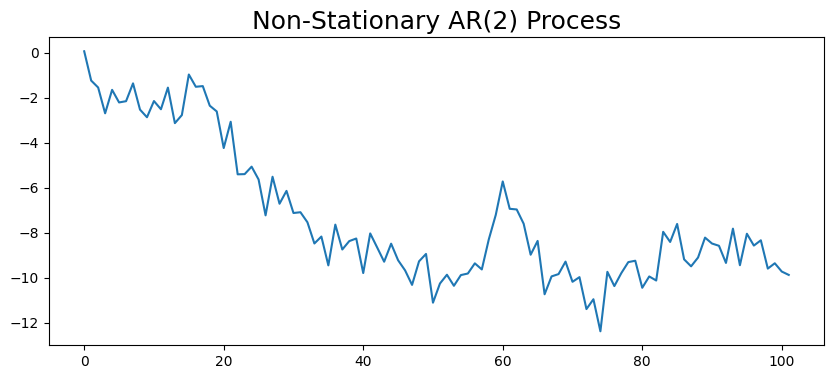

In [10]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)
plt.show()

In [11]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -2.058477
p-value: 0.261535
